In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [32]:
CI02 = utils.load_data("data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("data/for_learning_plus/CI21.npy")

In [33]:
GB_CI02 = CI02.where(CI02.dist2GB < 2)
GB_CI04 = CI04.where(CI04.dist2GB < 2)
GB_CI06 = CI06.where(CI06.dist2GB < 2)
GB_CI09 = CI09.where(CI09.dist2GB < 2)
GB_CI21 = CI21.where(CI21.dist2GB < 2)

In [34]:
from sklearn import svm

In [35]:
X1 = GB_CI02.iloc[:, 1:15]
X2 = GB_CI04.iloc[:, 1:15]
X3 = GB_CI06.iloc[:, 1:15]
X4 = GB_CI09.iloc[:, 1:15]
X5 = GB_CI21.iloc[:, 1:15]

y1 = GB_CI02.iloc[:, 0]
y2 = GB_CI04.iloc[:, 0]
y3 = GB_CI06.iloc[:, 0]
y4 = GB_CI09.iloc[:, 0]
y5 = GB_CI21.iloc[:, 0]

y_patch1 = y1.copy()
y_patch2 = y2.copy()
y_patch3 = y3.copy()
y_patch4 = y4.copy()
y_patch5 = y5.copy()

In [36]:
X_train = pd.concat((X1,X3,X4,X5))
y_train = pd.concat((y1,y3,y4,y5))

X_train = X_train[~X_train.dist2GB.isna()]
y_train = y_train[~y_train.isna()]

In [37]:
X_test = X2[~X2.dist2GB.isna()]
y_test = y2[~y2.isna()]
y_patch = y_patch2

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
clf = svm.SVC(kernel="rbf",class_weight={1: 5.0})

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

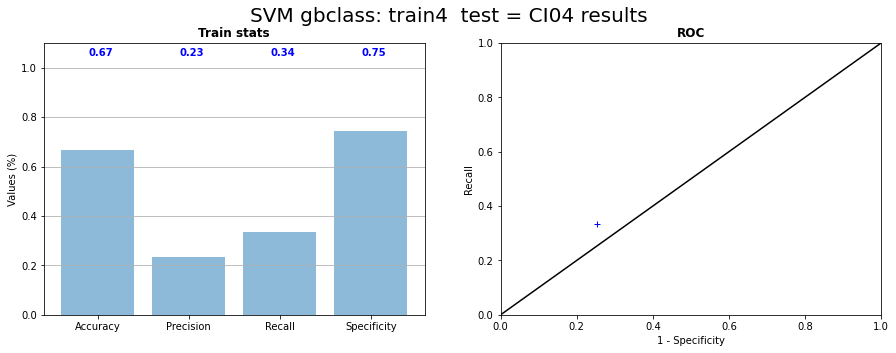

In [40]:
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM gbclass: train4  test = CI04")

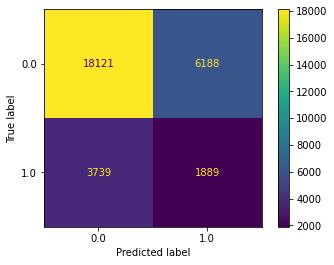

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

In [42]:
s = y_test[~y_test.isna()]

In [43]:
ind = 0
for i in s.index:
    y_patch[i] = y_pred[ind]
    ind += 1

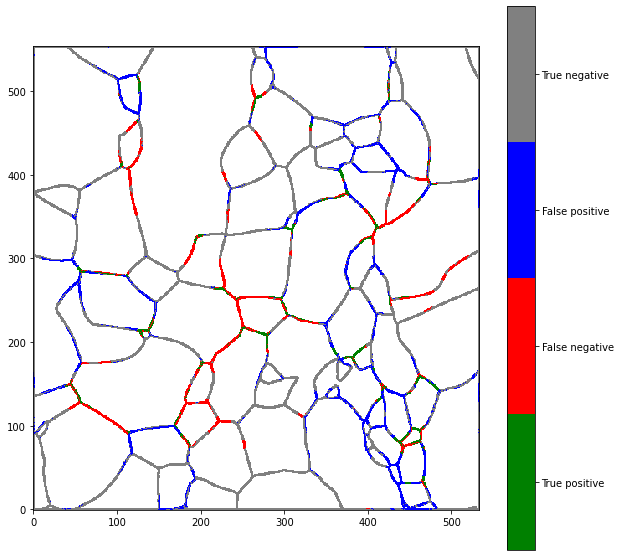

In [44]:
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
plt.figure(figsize=(10,10))
utils.plot_pred_proj(y_patch,y2,im_shape)